In [36]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageChops, ImageEnhance, ImageOps
from os import listdir, mkdir
from os.path import isfile, join


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

In [32]:
# dimensión de las imágenes
img_width, img_height = 100,100

#ruta de las imágenes
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

nb_train_samples = 2000
nb_validation_samples = 800

#Se puede disminuir las épocas para una prueba más rápida
#Podría demorar 1 minuto por época aproximadamente

epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)



In [ ]:
# ESTO ES PARA SALVAR LAS IMÁGENES CON LAS NUEVAS DIMENSIONES
#ruta = "dataset/train"
#newdir = "resizeImages"
#mkdir(newdir)

#def ls(ruta):
#    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

#def resized(origen, destino,ancho,largo):
    
#    for name in ls(origen):

        #print (name)
        #imagen = Image.open(origen+"/"+name)
        #new_image = imagen.resize((ancho, largo))
        #new_image.save(destino+"/"+"resized_"+name)

In [33]:
#resized(ruta, newdir, img_width, img_height)

In [27]:
#ESTRUCTURA INICIAL, parámetros temporales

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 21, 21, 64)       

In [23]:
#Compilación

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

#Creación del DataSET a partir de las imágenes en la carpeta dataset

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#REESCALADO

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Conjunto de datos y etiquetas para ENTRENAMIENTO
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Conjunto de datos y etiquetas para VALIDACIÓN
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 4035 images belonging to 2 classes.
Found 996 images belonging to 2 classes.


In [34]:
#Entrenamiento
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

# Salvado de pesos como archivo
model.save_weights('estructura_1.h5')


Epoch 1/5
125/125 [==============================] - 100s 801ms/step - loss: 0.2269 - accuracy: 0.9331 - val_loss: 0.2051 - val_accuracy: 0.9250
Epoch 2/5
125/125 [==============================] - 114s 912ms/step - loss: 0.2118 - accuracy: 0.9355 - val_loss: 0.1031 - val_accuracy: 0.9625
Epoch 3/5
125/125 [==============================] - 98s 781ms/step - loss: 0.1625 - accuracy: 0.9441 - val_loss: 0.0784 - val_accuracy: 0.9725
Epoch 4/5
125/125 [==============================] - 94s 752ms/step - loss: 0.1617 - accuracy: 0.9435 - val_loss: 0.1096 - val_accuracy: 0.9538
Epoch 5/5
125/125 [==============================] - 103s 826ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 0.0921 - val_accuracy: 0.9625


253/253 - 61s - loss: 0.1087 - accuracy: 0.9546


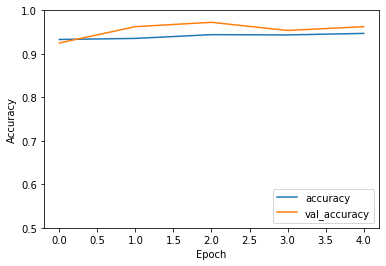

In [53]:
#Curva aciertos en épocas 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

evaluation = model.evaluate_generator(train_generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=2)


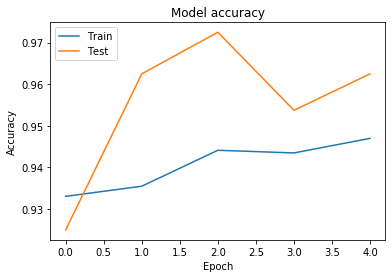

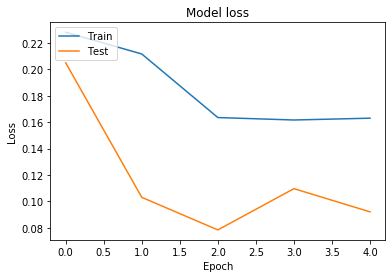

In [54]:
# Plot ENTRENAMIENTO & VALIDACI accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot ENTRENAMIENTO & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()